<h2>2. Gravitational orbits in Cartesian coordinates</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<h3>For this problem I will solve Lagrangian first by hand</h3>

Where Lagrangian in Cartesian coordinates is given by

$\begin{align}
  \mathcal{L} = \frac12 m_1 (\dot x_1 ^2 + \dot y_1 ^2) + \frac12 m_1 (\dot x_2 ^2 + \dot y_2 ^2)\
  + \frac{G m_1 m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}
\end{align}$

<h2>(a):</h2>

solves the two-body problem for gravitational attraction between two bodies

<h3>first impliment the gravitational orbit code as a python class</h3>

I derived the kinematic equations and formulated them into the code.



In [3]:
class twobody_Orbit():
    """
    Orbit class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    m1 : float
        mass of first body
    m2 : float
        mass of second body
    G : float
        gravitational constant

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1=1., m2=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dy_dt(self,t,y):
        """
        This function returns the right-hand side of the diffeq: 
        
        [dx1_dt, d^2x1_dt^2, dy1_dt, d^2y1_dt^2, dx2_dt, d^2x2_dt^2, dy2_dt, d^2y2_dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 8-component vector with y[0] = x_1(t), y[1] = x_dot_1(t), y[2] = y_1(t), y[3] = y_dot_1(t), y[4] = x_2(t), y[5] = x_dot_2(t), y[6] = y_2(t), y[7] = y_dot_2(t)
            
            
        Returns
        -------
        
        """
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
        dy_dt = np.array(y)
        
        r = np.sqrt((y[0]-y[4])**2+(y[2]-y[6])**2)
        
        dy_dt[0] = y[1]
        dy_dt[1] = self.G *self.m2 * (y[4]-y[0])/r**3
        dy_dt[2] = y[3]
        dy_dt[3] = self.G *self.m2 * (y[6]-y[2])/r**3
        dy_dt[4] = y[5]
        dy_dt[5] = -self.G *self.m1 * (y[4]-y[0])/r**3
        dy_dt[6] = y[7]
        dy_dt[7] = -self.G *self.m1 * (y[6]-y[2])/r**3
        
        return dy_dt
    def solve_ode(self,t_pts,x0_1,x0_1dot,y0_1,y0_1dot,x0_2,x0_2dot,y0_2,y0_2dot,abserr=1.0e-10,relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x0_1,x0_1dot,y0_1,y0_1dot,x0_2,x0_2dot,y0_2,y0_2dot] 
        solution = solve_ivp(self.dy_dt,(t_pts[0],t_pts[-1]),y,t_eval=t_pts,atol=abserr,rtol=relerr)
        x_1,x_dot_1,y_1,y_dot_1,x_2,x_dot_2,y_2,y_dot_2 = solution.y

        return x_1,x_dot_1,y_1,y_dot_1,x_2,x_dot_2,y_2,y_dot_2

<h3>Solve the first problem using the defined functions</h3>

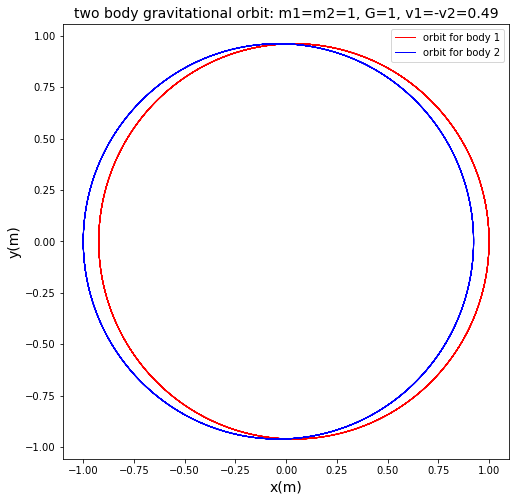

In [4]:
#first devide variables to small pieces and define the masses and gravitational constant
t_pts = np.arange(0,100,0.01)  
m1=1.
m2=1.
G=1.
two_body = twobody_Orbit(m1=m1,m2=m2,G=G)

#Pick inital conditions in order to let CM be "almost-stationary"
x0_1, x0_1dot = 1., 0.
y0_1, y0_1dot = 0., 0.49
x0_2,x0_2dot = - (m1/m2) * x0_1, - (m1/m2) * x0_1dot
y0_2,y0_2dot = - (m1/m2) * y0_1, - (m1/m2) * y0_1dot

#plug values into function we define
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = two_body.solve_ode(t_pts,x0_1, x0_1dot,y0_1, y0_1dot,x0_2,x0_2dot,y0_2,y0_2dot)

#Now set up the plot
plt.figure(figsize=(8,8))
plt.xlabel('x(m)', fontsize=14)
plt.ylabel('y(m)', fontsize=14)
plt.title('two body gravitational orbit: m1=m2=1, G=1, v1=-v2=0.49', fontsize=14)
plt.plot(x_1, y_1, linewidth=1.0, label='orbit for body 1',color = 'red')
plt.plot(x_2, y_2, linewidth=1.0, label='orbit for body 2',color = 'blue')
plt.legend()

<h2>(b):</h2>

Show that problem reduces to the orbits considerd in class if one of the bodies is very heavy and I'm in its rest frame


<h3>We can show this easily by changing masses and initial condition</h3>


<h3>So I repeat the above code but with different masses and initial condition</h3>


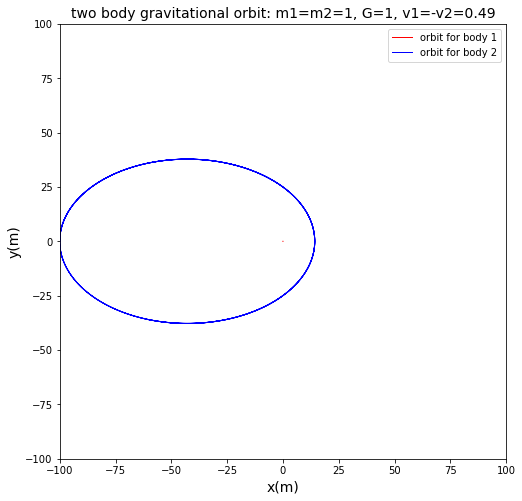

In [12]:
#first devide variables to small pieces and define the masses and gravitational constant
t_pts = np.arange(0,100,0.01)  
m1=10000.
m2=1.
G=1.
two_body = twobody_Orbit(m1=m1,m2=m2,G=G)

x0_1, x0_1dot = 0., 0.
y0_1, y0_1dot = 0., 0.
x0_2,x0_2dot = -100. , 0.
y0_2,y0_2dot = 0. , 5.

#plug values into function we define
x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = two_body.solve_ode(t_pts,x0_1, x0_1dot,y0_1, y0_1dot,x0_2,x0_2dot,y0_2,y0_2dot)

#Now set up the plot
plt.figure(figsize=(8,8))
#Here I specified the plot range in order to get intuition
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.xlabel('x(m)', fontsize=14)
plt.ylabel('y(m)', fontsize=14)
plt.title('two body gravitational orbit: m1=m2=1, G=1, v1=-v2=0.49', fontsize=14)
plt.plot(x_1, y_1, linewidth=1.0, label='orbit for body 1',color = 'red')
plt.plot(x_2, y_2, linewidth=1.0, label='orbit for body 2',color = 'blue')
plt.legend()

Hence we see the orbit reduced to the one we considered in class (an ellipse) if we pick appropriate masses and initial conditions!